In [19]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np
import functools
import operator

BFS [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]
depth 1: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)]
depth 2: [(1, 30), (2, 28), (2, 9), (5, 16), (8, 33), (2, 32), (31, 24), (31, 25), (2, 27)]
depth 3: [(27, 23), (32, 22), (32, 15), (32, 20), (33, 26), (32, 14), (32, 18), (32, 29)]
depth 4: []


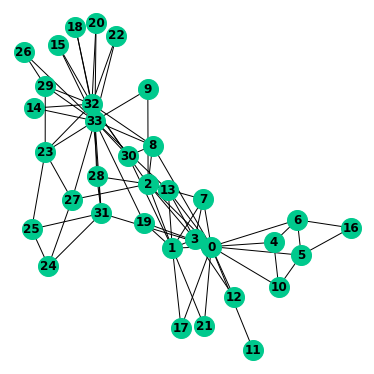

In [12]:
G = nx.karate_club_graph()
plt.figure(figsize=(5,5))
nx.draw_spring(G, node_size=400, node_color="#00C98D", with_labels=True, font_weight="bold")
print("BFS", list(nx.bfs_edges(G, source=0)))

# Depth = 1
d1 = list(nx.bfs_edges(G, source=0, depth_limit=1))
print("depth 1:", d1)

# Depth = 2
d2 = list(nx.bfs_edges(G, source=0, depth_limit=2))
print("depth 2:", list(set(d2) - set(d1)))

# Depth = 3
d3 = list(nx.bfs_edges(G, source=0, depth_limit=3))
print("depth 3:", list(set(d3) - set(d2)))

# Depth = 4
d4 = list(nx.bfs_edges(G, source=0, depth_limit=4))
print("depth 4:", list(set(d4) - set(d3)))

In [13]:
print("DFS:", list(nx.dfs_edges(G, source=0)))
print("traversed nodes:", list(nx.dfs_preorder_nodes(G, source=0)))

DFS: [(0, 1), (1, 2), (2, 3), (3, 7), (3, 12), (3, 13), (13, 33), (33, 8), (8, 30), (30, 32), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (23, 25), (25, 24), (24, 27), (24, 31), (31, 28), (23, 29), (29, 26), (33, 9), (33, 19), (1, 17), (1, 21), (0, 4), (4, 6), (6, 5), (5, 10), (5, 16), (0, 11)]
traversed nodes: [0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]


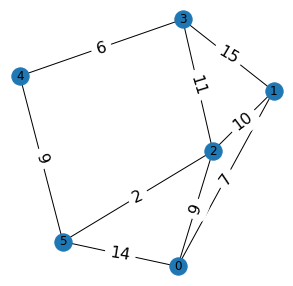

In [17]:
G = nx.Graph()
G.add_nodes_from(range(0, 5))
G.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), (0, 5, 14), (1, 2, 10), (1, 3, 15), (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

In [23]:
dist_estimate = [999] * nx.number_of_nodes(G)
dist_certainty = [0] * nx.number_of_nodes(G)
dist_estimate[1] = 0

while functools.reduce(operator.mul, dist_certainty) == 0:
  print("Estimation: ", dist_estimate)
  print("Certaintly: ", dist_certainty)
  min_v = 999
  for n in nx.nodes(G):
    if (dist_certainty[n] ==0) and (dist_estimate[n] <= min_v):
      min_v = dist_estimate[n]
      min_id = n
    dist_certainty[min_id] = 1
    for nb in G.neighbors(min_id):
      new_estimate = G[min_id][nb]["weight"] + dist_estimate[min_id]
      if new_estimate < dist_estimate[nb]:
        dist_estimate[nb] = new_estimate
        print("Estimation: ", dist_estimate)
        print("Certaintly: ", dist_certainty)

Estimation:  [999, 0, 999, 999, 999, 999]
Certaintly:  [0, 0, 0, 0, 0, 0]
Estimation:  [7, 0, 999, 999, 999, 999]
Certaintly:  [1, 1, 0, 0, 0, 0]
Estimation:  [7, 0, 10, 999, 999, 999]
Certaintly:  [1, 1, 0, 0, 0, 0]
Estimation:  [7, 0, 10, 15, 999, 999]
Certaintly:  [1, 1, 0, 0, 0, 0]
Estimation:  [7, 0, 10, 15, 999, 999]
Certaintly:  [1, 1, 0, 0, 0, 0]
Estimation:  [7, 0, 10, 15, 999, 12]
Certaintly:  [1, 1, 1, 0, 0, 0]
Estimation:  [7, 0, 10, 15, 999, 12]
Certaintly:  [1, 1, 1, 0, 0, 0]
Estimation:  [7, 0, 10, 15, 21, 12]
Certaintly:  [1, 1, 1, 1, 0, 0]
Estimation:  [7, 0, 10, 15, 21, 12]
Certaintly:  [1, 1, 1, 1, 0, 1]
